# Generating cropped images and annotating them for Bland-Altman analysis

In [1]:
from skimage.io import imread, imsave
import pyclesperanto_prototype as cle
import napari
import os
import numpy as np
import pandas as pd
from aicsimageio import AICSImage
from skimage.feature import peak_local_max

In [3]:
stack_folder_name = '#4722 - 02.05.2023'
dataset_folder = r'C:\Nisarg\Thesis\Data'

In [4]:
stack_folder = os.path.join(dataset_folder, stack_folder_name)

In [5]:
#Listing '.czi' images in the folder that are Airyscan processed
file_names = os.listdir(stack_folder)

file_names_filtered = []
for file_name in file_names:
    if file_name.find('airy') >=0 and file_name.find('.czi') >= 0:
        file_names_filtered.append(file_name)
file_names_filtered

['#4722_01_M66_CQ-Rapa_zstack_0.8%_airy.czi',
 '#4722_02_M66_CQ-Rapa_zstack_0.5%_airy.czi',
 '#4722_03_M66_CQ-Rapa_zstack_1.1%_airy.czi',
 '#4722_04_M66_CQ-Rapa_zstack_2%_airy.czi',
 '#4722_05_M66_CQ-Rapa_zstack_0.8%_airy.czi',
 '#4722_06_M66_CQ-Rapa_zstack_2.2%_airy.czi',
 '#4722_07_M66_CQ-Rapa_zstack_2.4%_airy.czi',
 '#4722_08_M66_CQ-Rapa_zstack_0.5%_airy.czi',
 '#4722_09_M66_CQ-Rapa_zstack_0.2%_airy.czi',
 '#4722_10_M66_CQ-Rapa_zstack_0.4%_airy.czi']

## Run through images one-by-one

In [6]:
i=2
print(file_names_filtered[i])

#4722_03_M66_CQ-Rapa_zstack_1.1%_airy.czi


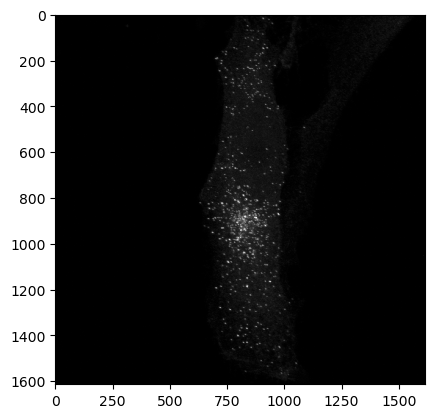

In [7]:
image_name = file_names_filtered[i]
aics_image = AICSImage(os.path.join(stack_folder, image_name))
full_image = aics_image.get_image_data("ZYX", T=0, C=0)
Voxel_size_z = aics_image.physical_pixel_sizes.Z
Voxel_size_y = aics_image.physical_pixel_sizes.Y
Voxel_size_x = aics_image.physical_pixel_sizes.X
cle.imshow(full_image)

In [8]:
#Image normalization
full_image = full_image/full_image.max()

(35, 100, 100)


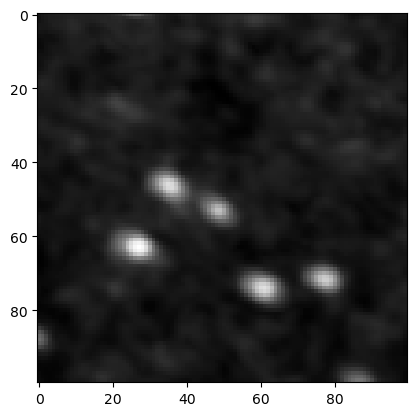

In [9]:
#XY coordinates for top-left corner of the crop frame
x=850
y=1300

#Cropping cube of 100 pixels x 100 pixels in XY plane and corresponding full z stack
image = full_image[:, y:y+100, x:x+100] #ZYX [:,1150:1800,:1500]
print(image.shape)
cle.imshow(image)

In [12]:
zoom_factor=3 #Maximum upto 4.28 (Voxel.size.z / Voxel.size.x = 4.28)

#Rescale to isotropic
rescaled_crop = cle.scale(image, factor_x= zoom_factor*(Voxel_size_x/Voxel_size_z), factor_y= zoom_factor*(Voxel_size_y/Voxel_size_z), factor_z= zoom_factor*(1.0), auto_size= True)


In [13]:
viewer = napari.Viewer()
viewer.add_image(rescaled_crop)

<Image layer 'rescaled_crop' at 0x22c79fd3850>

In [14]:
image_name = file_names_filtered[i]
image_name = image_name + '_' + str(x) + '_' + str(y)
print(image_name)

#4722_03_M66_CQ-Rapa_zstack_1.1%_airy.czi_850_1300


C:\Users\njdob\miniconda3\envs\sqstm1\lib\site-packages\napari\layers\base\base.py:1632: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
C:\Users\njdob\miniconda3\envs\sqstm1\lib\site-packages\napari\layers\base\base.py:1632: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
C:\Users\njdob\miniconda3\envs\sqstm1\lib\site-packages\napari\layers\base\base.py:1632: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped


In [15]:
points = viewer.layers[1].data
points

array([[52.        , 44.4294143 , 18.62463776],
       [52.        , 32.71055373, 24.60048085],
       [52.        , 37.83270471, 33.99109143],
       [52.        , 52.34546582, 42.76083519],
       [52.        , 50.32764876, 55.02295478]])

In [16]:
BA_folder = r'C:\Nisarg\Thesis\Data\Bland-Altman\M66'

#Saving crops (.tif) and manual annotation (.csv)
crop_path = os.path.join(BA_folder, image_name)
imsave(fname = crop_path + ".tif", arr= rescaled_crop)
np.savetxt(crop_path + ".csv", points, delimiter=",")

C:\Users\njdob\AppData\Local\Temp\ipykernel_19712\1690558949.py:5: UserWarning: C:\Nisarg\Thesis\Data\Bland-Altman\M66\#4722_03_M66_CQ-Rapa_zstack_1.1%_airy.czi_850_1300.tif is a low contrast image
  imsave(fname = crop_path + ".tif", arr= rescaled_crop)
